folium

folium은 지도 시각화 라이브러리로, leaflet.js를 기반으로 만들어졌다. 지도에 마커를 표현하거나 범위를 나타내는 도형을 입력할 수 있다.

In [1]:
import folium

In [2]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
survey_raw_df = pd.read_csv('datas/survey_results_public.csv', index_col='ResponseId')

In [4]:
lat, long = 37.497159, 126.927651

In [5]:
popup_tag = """
<div style='width:100px'>
    <a href='https://playdata.io/'>
      플레이데이터
    </a>
</div>
"""

In [6]:
m = folium.Map(location=(lat, long), width=750, height=500, zoom_start=17)
folium.Marker([lat, long], popup=popup_tag, tooltip='플레이데이터').add_to(m)
m

In [7]:
import requests as rq
import json

In [8]:
url = "https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json"
res = rq.get(url)
countries_json = res.json()

In [23]:
country_name = [feature['properties']['name'] for feature in countries_json['features']]

In [10]:
country_counts = survey_raw_df.Country.value_counts()
country_counts_df = pd.DataFrame({'Country':country_counts.index, 'counts':country_counts.values})

In [11]:
country_counts_df.at[12, 'Country']='Russia'

In [24]:
set(country_counts_df.Country).symmetric_difference(country_name)

{'Andorra',
 'Antarctica',
 'Antigua and Barbuda',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Bermuda',
 'Brunei',
 'Brunei Darussalam',
 'Burundi',
 'Cape Verde',
 'Central African Republic',
 'Congo, Republic of the...',
 "Côte d'Ivoire",
 'East Timor',
 'Equatorial Guinea',
 'Eritrea',
 'Falkland Islands',
 'French Guiana',
 'French Southern and Antarctic Lands',
 'Greenland',
 'Guinea Bissau',
 'Hong Kong (S.A.R.)',
 'Iran',
 'Iran, Islamic Republic of...',
 'Isle of Man',
 'Ivory Coast',
 "Lao People's Democratic Republic",
 'Laos',
 'Libya',
 'Libyan Arab Jamahiriya',
 'Macedonia',
 'Maldives',
 'Mauritius',
 'Moldova',
 'Monaco',
 'New Caledonia',
 'Nomadic',
 'Northern Cyprus',
 'Palau',
 'Palestine',
 'Puerto Rico',
 'Republic of Moldova',
 'Republic of Serbia',
 'Republic of the Congo',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'San Marino',
 'Serbia',
 'Seychelles',
 'Singapore',
 'Somaliland',
 'South Sudan',
 'Syria',
 'Syrian Arab Republic',
 'The Bahamas',
 'The former Yugo

In [13]:
rename_data = {
    'Republic of Korea':'South Korea',
    'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
    'Viet Nam':'Vietnam',
    'Russian Federation':'Russia'
}

In [14]:
country_counts_df = country_counts_df.replace(rename_data)

In [15]:
country_counts_df.loc[country_counts_df.Country==rename_data.values()]

,Country,counts


In [16]:
m = folium.Map(location=(30, 0), zoom_start=2)

In [17]:
folium.Choropleth(
    geo_data=url,
    data=country_counts_df, #만든 데이터
    columns=['Country','counts'], #컬럼
    key_on='feature.properties.name',
    threshold_scale=[1,30,100,300,1_000,3_000,10_000,14_000], #범위(상단바)
    fill_color='YlGn', #색
    fill_opacity=0.7,  #면적 투명도
    line_opacity=0.2,  #선 투명도
    legend_name='Respondents',  #범례
).add_to(m)
folium.LayerControl().add_to(m)
m

In [18]:
m.save('datas/country.html')

In [19]:
seoul_geojson='https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'

m=folium.Map(location = [37.57, 126.99], zoom_start=11)

folium.Choropleth(
    geo_data=seoul_geojson,
    fill_color='#22AA44',
    fill_opacity=0.4,
    line_opacity=1
).add_to(m)
m

wordcloud

문자열 내의 빈도를 가지고 시각화를 한다.

In [20]:
from wordcloud import WordCloud as wc

In [32]:
survey_raw_df = pd.read_csv('datas/survey_results_public.csv', index_col='ResponseId')
temp_words = survey_raw_df.DevType.dropna()

In [33]:
temp_words = temp_words.str.replace(';', ' ').str.replace(',', ' ')

In [36]:
words = ' '.join(temp_words)

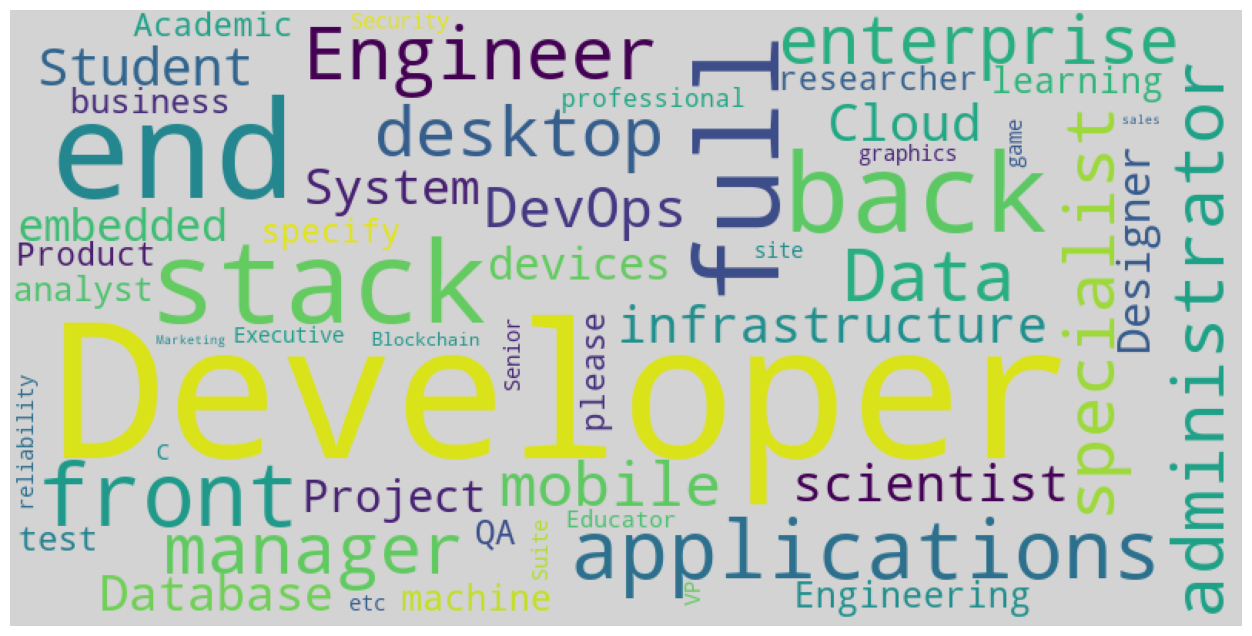

In [41]:
WC = wc(collocation_threshold=int(1e6),
       width=800, height=400,
       background_color='lightgrey').generate(words)

plt.figure(figsize=(16, 8))
plt.axis('off')
plt.grid(False)
plt.imshow(WC)
plt.show()